# Actividad DBSCAN y hierarchical clustering (analisis)

En esta actividad se debe aplicar dbscan y hierarhical clustering para unos datos de videojuegos e interpretar sus resultados. Como ejemplo, se presenta los resutlados para el modelo de k-means.

In [1]:
#Instalando las librerias requeridas
#import sys
#!{sys.executable} -m pip install numpy, pandas, plotnine, sklearn

In [2]:
import numpy as np
import pandas as pd
from plotnine import *

In [3]:
#Cargando set de datos y haciendo limpieza
origData=pd.read_csv("Datos/video_games_sales.csv")
origData=origData.dropna() #Eliminando datos con valores N
origData.head(3)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E


In [4]:
origData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6825 entries, 0 to 16706
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             6825 non-null   object 
 1   Platform         6825 non-null   object 
 2   Year_of_Release  6825 non-null   float64
 3   Genre            6825 non-null   object 
 4   Publisher        6825 non-null   object 
 5   NA_Sales         6825 non-null   float64
 6   EU_Sales         6825 non-null   float64
 7   JP_Sales         6825 non-null   float64
 8   Other_Sales      6825 non-null   float64
 9   Global_Sales     6825 non-null   float64
 10  Critic_Score     6825 non-null   float64
 11  Critic_Count     6825 non-null   float64
 12  User_Score       6825 non-null   object 
 13  User_Count       6825 non-null   float64
 14  Developer        6825 non-null   object 
 15  Rating           6825 non-null   object 
dtypes: float64(9), object(7)
memory usage: 906.4+ KB


In [5]:
#eliminando las variables discretas y transformando el resto a númerico
origDataNumeric=origData.iloc[:,[5,6,7,8,10,12]]
for i in range(origDataNumeric.shape[1]):
    origDataNumeric.iloc[:,i]=pd.to_numeric(origDataNumeric.iloc[:,i])
newData=origDataNumeric.copy() 
newData.head(3)


/var/folders/hq/s994n_rs38zddnwxzys82dc00000gn/T/ipykernel_2659/2966018337.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/var/folders/hq/s994n_rs38zddnwxzys82dc00000gn/T/ipykernel_2659/2966018337.py:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`


,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Critic_Score,User_Score
0,41.36,28.96,3.77,8.45,76.0,8.0
2,15.68,12.76,3.79,3.29,82.0,8.3
3,15.61,10.93,3.28,2.95,80.0,8.0


In [6]:
#Estandarizando las variables entre 0 y 1
newData -= newData.min()
newData /= newData.max()
print(newData.head(3))

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Critic_Score  User_Score
0  1.000000  1.000000  0.580000     0.799432      0.741176    0.824176
2  0.379110  0.440608  0.583077     0.311258      0.811765    0.857143
3  0.377418  0.377417  0.504615     0.279092      0.788235    0.824176


/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10

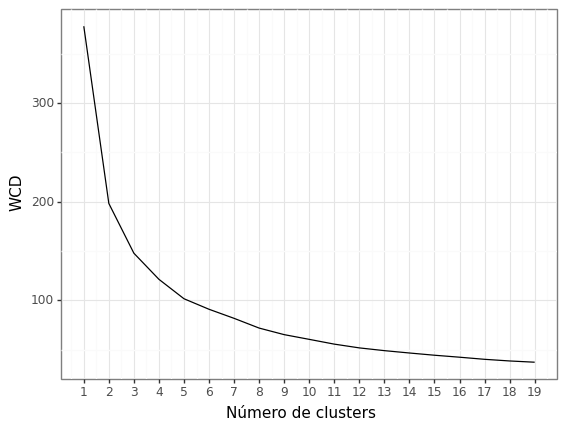

<ggplot: (301957981)>

In [7]:
#Aplicando K-means
from sklearn.cluster import KMeans
sse = []
maxK=20
for k in range(1, maxK):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(newData)
    sse.append(kmeans.inertia_)
#Graficamos
(ggplot()+aes(x=range(1, maxK),y=sse)+theme_bw()+geom_line()+labs(x="Número de clusters",y="WCD")
 +scale_x_continuous(breaks=range(1,maxK)))

In [8]:
#Seleccionando entre 5 y 8 clusters
numK=8
finalModel=KMeans(n_clusters=numK)
finalModel=finalModel.fit(newData)

/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


In [9]:
#Analizando los clusters
#Creando un dataframe para comparar medias

#Creamos el encabezado
temp=['c'+str(i) for i in range(numK)]
temp.insert(0,"var")
#print(temp)
#Creamos el DataFrame con valores nulos
tempDF=pd.DataFrame(index=np.arange(0, newData.shape[1]),columns=temp)
#print(tempDF)
#Rellenamos el DataFrame con los valores de las medias
for i in range(newData.shape[1]): #newData.shape[1] es el número de columnas 
    tempDF.iloc[i,0]=newData.columns[i] 
    # Para cada uno de los cluster agregamos en el DataFrame el promedio y la desviación estandar
    for j in range(numK):
        tempDF.iloc[i,j+1]=np.round(origDataNumeric.iloc[finalModel.labels_==j,i].mean(),2).astype("str")+"+-"+np.round(origDataNumeric.iloc[finalModel.labels_==j,i].std(),2).astype("str")
tempDF


,var,c0,c1,c2,c3,c4,c5,c6,c7
0,NA_Sales,0.27+-0.38,0.17+-0.21,0.44+-0.76,0.67+-0.96,0.21+-0.53,6.11+-7.23,0.33+-0.76,0.14+-0.2
1,EU_Sales,0.14+-0.23,0.08+-0.14,0.28+-0.53,0.39+-0.64,0.11+-0.28,4.58+-5.28,0.24+-0.65,0.07+-0.12
2,JP_Sales,0.05+-0.15,0.01+-0.05,0.03+-0.12,0.1+-0.24,0.03+-0.11,3.02+-1.27,0.02+-0.09,0.01+-0.04
3,Other_Sales,0.05+-0.09,0.03+-0.05,0.1+-0.21,0.13+-0.23,0.04+-0.1,1.74+-2.33,0.07+-0.18,0.03+-0.05
4,Critic_Score,73.29+-4.05,49.5+-6.53,77.03+-5.43,85.57+-4.27,61.43+-4.96,85.15+-8.31,67.69+-7.28,38.92+-9.08
5,User_Score,8.18+-0.46,6.08+-0.71,6.75+-0.53,8.36+-0.48,7.35+-0.62,8.26+-0.69,4.85+-0.91,3.53+-1.03


In [10]:
newData

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Critic_Score,User_Score
0,1.000000,1.000000,0.580000,0.799432,0.741176,0.824176
2,0.379110,0.440608,0.583077,0.311258,0.811765,0.857143
3,0.377418,0.377417,0.504615,0.279092,0.788235,0.824176
6,0.272727,0.315608,1.000000,0.272469,0.894118,0.879121
7,0.337524,0.316989,0.450769,0.268685,0.529412,0.670330
...,...,...,...,...,...,...
16667,0.000242,0.000000,0.000000,0.000000,0.388235,0.208791
16677,0.000242,0.000000,0.000000,0.000000,0.800000,0.912088
16696,0.000000,0.000345,0.000000,0.000000,0.788235,0.780220
16700,0.000242,0.000000,0.000000,0.000000,0.564706,0.582418


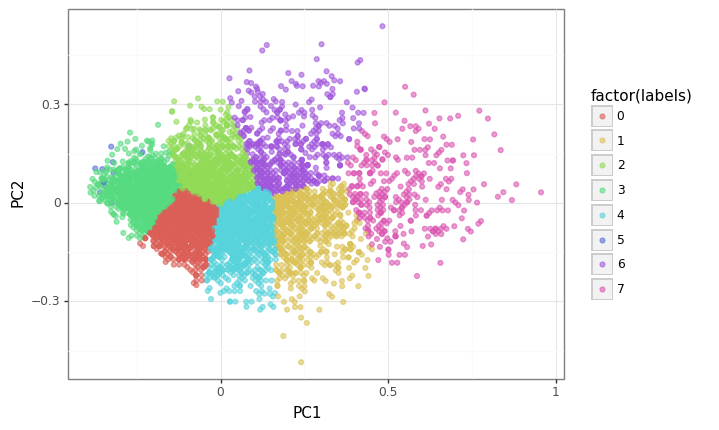

<ggplot: (310764741)>

In [11]:
#Visualizando los clusters con PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca = pca.fit(newData)
tempData = pca.transform(newData)
tempData.shape
tempData = pd.DataFrame(tempData,columns=["PC1","PC2"])
tempData["labels"]=finalModel.labels_
ggplot(tempData)+aes(x="PC1",y="PC2",color="factor(labels)")+geom_point(alpha=0.6)+theme_bw()

# Ejercicio 1
## Describa las características importantes de cada cluster
AVISO el orden de los clusters puede cambiar
En terminos de ventas no hay ninguna diferencia significativa. Si se da una importancia en terminos de score de usuarios.<br>
Los clusters 2 y 3 corresponden a juegos donde tanto las críticas de los usuarios como la de los expertos son buenas y malas respectivamente.<br> 
En cambio el cluster 4 tiene buenas críticas de experto, pero malas de usuario.<br>
Los cluster 0 y 1 tiene críticas similares, pero en una las críticas del usuario son mayor a las del experto y viceversa.

# Ejercicio 2
Aplique DBSCAN, encuentre el mejor eps para minPts=7 y explique los clusters encontrados

# DBSCAN
DBSCAN(eps=0.5,min_samples=5, metric='euclidean')<br><br>
Parámetros
* eps: radio de la esfera n-dimensional para la cual se buscan los minPoints.
* minPts: número mínimo de puntos dentro de la región definida por eps para considerar a un punto como crítico (el punto a analizar también se cuenta).
* metric: métrica para el cálculo de la distancia<br> 
scikit-learn => ‘cityblock’, ‘cosine’, ‘euclidean’,‘manhattan’ <br>
scipy.spatial.distance => ‘chebyshev’, ‘correlation’, ‘hamming’, ‘jaccard’, ‘mahalanobis’, ‘minkowski’, ‘seuclidean’,’sqeuclidean’.<br><br>

Atributos
* core_sample_indices_: indices de puntos core.
* components_: Copia de los puntos core.
* labels_: etiquetas de los puntos (-1 implica outlier).<br><br>

Funciones:
* fit(X): entrena el modelo con los parametros asignados.
* fit_predict(X): entrena y devuelve los clusters encontrados con los parametros asignados.

# clase NearestNeighbors
NearestNeighbors(n_neighbors=5, metric='minkowski', p=2)<br>
Parámetros
* n_neighborsint: Números de vecinos a estimar.
* metric: métrica para el cálculo de la distancia.
* p: parámetro de la distancia de minkowski (2 es euclideana). <br><br>

Atributos
* effective_metric_: métrica usada para el cálculo de la distancia.
* effective_metric_params_: Parámetros de la métrica usada para el cálculo de la distancia.
* n_samples_fit_: número de puntos del dataset.<br><br>

Funciones:
* fit(X): Encontrar los vecinos más cercanos de los datos.
* kneighbors(X, n_neighbors): Encontrar los K vecinos más cercano de un punto, retorna tanto los índices como la distancia.
* radius_neighbors(X, radius): Encontrar los vecinos de uno o más puntos que se encuentran dentro de un radio determinado.

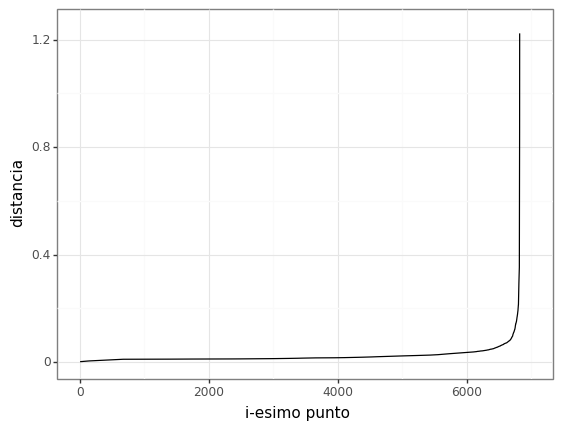

<ggplot: (310774853)>

In [12]:
#Usando minPoints = 7, busque el mejor eps
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
numNeighboors=7
neighbors = NearestNeighbors(n_neighbors=numNeighboors) #Creando el modelo
neighbors_fit = neighbors.fit(newData) #"Entrenando" el modelo
distances, indices = neighbors_fit.kneighbors(newData) #"Buscando los vecinos más cercanos"
distances = distances[:,numNeighboors-1]
distances.sort()
(ggplot()
 +aes(x=range(1,len(distances)+1),y=distances)
 +theme_bw()
 +geom_line()
 +labs(y="distancia",x="i-esimo punto")
 +coord_cartesian([0,7000],[0,1.25])
)

In [13]:
#Aplique DBSCAN usando el eps que usted estime conveniente
#Analice los clusters encontrados
#¿Difieren de los clusters de k-means?
finalModel = DBSCAN(eps=0.03, min_samples=7)
finalModel = finalModel.fit(newData)
numK=len(np.unique(finalModel.labels_))-1

In [14]:
#Analizando los clusters
#Creando un dataframe para comparar medias
temp=['c'+str(i) for i in range(numK)]
temp.insert(0,"var")
tempDF=pd.DataFrame(index=np.arange(0, newData.shape[1]),columns=temp)
for i in range(newData.shape[1]):
    tempDF.iloc[i,0]=newData.columns[i]
    for j in range(numK):
        tempDF.iloc[i,j+1]=np.round(origDataNumeric.iloc[finalModel.labels_==j,i].mean(),2).astype("str")+"+-"+np.round(origDataNumeric.iloc[finalModel.labels_==j,i].std(),2).astype("str")
tempDF


,var,c0,c1,c2,c3,c4
0,NA_Sales,0.25+-0.33,0.29+-0.37,0.13+-0.16,0.15+-0.16,0.1+-0.06
1,EU_Sales,0.13+-0.2,0.09+-0.06,0.18+-0.09,0.12+-0.12,0.03+-0.03
2,JP_Sales,0.02+-0.06,0.54+-0.07,0.01+-0.02,0.0+-0.0,0.0+-0.0
3,Other_Sales,0.05+-0.07,0.04+-0.03,0.04+-0.04,0.04+-0.04,0.01+-0.01
4,Critic_Score,70.24+-12.49,70.1+-1.1,81.88+-1.25,61.0+-1.83,25.5+-1.16
5,User_Score,7.29+-1.23,8.01+-0.16,4.32+-0.1,3.52+-0.14,3.76+-0.17


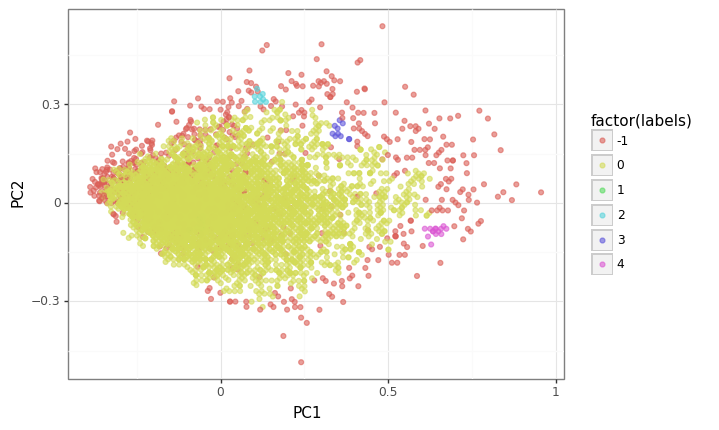

<ggplot: (310937985)>

In [15]:

#Visualizando los clusters con PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca = pca.fit(newData)
tempData = pca.transform(newData)
tempData.shape
tempData = pd.DataFrame(tempData,columns=["PC1","PC2"])
tempData["labels"]=finalModel.labels_
ggplot(tempData)+aes(x="PC1",y="PC2",color="factor(labels)")+geom_point(alpha=0.6)+theme_bw()


#Descartando los outliers y el cluster principal, existen 4 otros clusters
* cluster 1 => Muy buena venta en Japón, con buena crítica de usuario.
* cluster 2 => Juegos con buena crítica de experto, pero muy mala de usuario, con buena venta en Europa
* cluster 3 => Juegos con media crítica de experto, pero muy mala de usuario
* cluster 4 => Los peores juegos, tanto de expertos como de usuarios. Además, sus ventas son bajas

# Ejercicio 3
## Comparemos los dendrogramas utilizando las distintas métodos de  distancia y explique los cluster encontrados
### Hint: cuando grafique el dendrograma use truncate_mode="lastp" para evitar problemas de memoria.

# AgglomerativeClustering

sklearn tiene varias deficiencias para este modelo. Siendo las más importantes, el definir un número de cluster y no generar un dendrograma en forma sencilla.<br>

Utilizaremos las funciones linkage, dendrogram y dendrogram de la biblioteca scipy.cluster.hierarchy.<br>

La función linkage aprende el modelo definido y retorna un dendrograma<br>
linkage(y, method='single')<br>
Parámetros:
* y: son los datos del modelo
* method: ‘ward’, ‘complete’, ‘average’, ‘single’.<br><br>

Para graficar basta con llamar a la función dendrogram con el modelo aprendido<br>dendrogram(modeloAprendido,p=30,truncate_mode=None)<br>
donde truncate_mode puede ser None (muestra todo el dendrograma) o 'lastp' (corta el dendrograma después de p ramas).

Para extraer los clusters se utiliza la función fcluster
fcluster(Z, t, criterion)<br>
Parámetros:
* Z: el modelo generardo por la función linkage
* t: el valor donde se quiere cortar el dendrograma
* criterion=“distance”. existen otros criterios de corte, pero distance es el que nos permite generar los clusters, basados en la altura que definimos.

In [16]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

#Entrenando el modelo
modelo = shc.linkage(newData, method='complete')
plt.figure(figsize=(10, 7)) #Seteando el tamaño de la figura
objeto = shc.dendrogram(modelo,p=100,truncate_mode="lastp") #Generando el dendrograma

In [17]:
#Seleccione uno de los métodos e interprete los clusters generados
#Se selecciono el método complete para analizar 6 clusters distintos 
clusters=shc.fcluster(modelo,t=1.0,criterion="distance")-1
numK=len(np.unique(clusters))

In [18]:
#Analizando los clusters
#Creando un dataframe para comparar medias
temp=['c'+str(i) for i in range(numK)]
temp.insert(0,"var")
tempDF=pd.DataFrame(index=np.arange(0, newData.shape[1]),columns=temp)
for i in range(newData.shape[1]):
    tempDF.iloc[i,0]=newData.columns[i]
    for j in range(numK):
        tempDF.iloc[i,j+1]=np.round(origDataNumeric.iloc[clusters==j,i].mean(),2).astype("str")+"+-"+np.round(origDataNumeric.iloc[clusters==j,i].std(),2).astype("str")
tempDF


,var,c0,c1,c2,c3,c4,c5
0,NA_Sales,0.15+-0.23,0.58+-0.95,0.39+-0.74,6.22+-4.54,9.53+-4.86,41.36+-nan
1,EU_Sales,0.08+-0.16,0.41+-0.81,0.22+-0.49,0.2+-0.28,8.18+-2.65,28.96+-nan
2,JP_Sales,0.01+-0.04,0.03+-0.1,0.07+-0.25,0.76+-0.49,4.33+-1.16,3.77+-nan
3,Other_Sales,0.03+-0.05,0.13+-0.24,0.08+-0.18,9.05+-2.15,2.13+-0.77,8.45+-nan
4,Critic_Score,43.05+-7.91,74.73+-10.53,73.52+-10.24,92.0+-4.24,82.9+-5.0,76.0+-nan
5,User_Score,5.26+-1.58,5.0+-1.32,7.63+-0.96,8.75+-0.35,8.06+-0.54,8.0+-nan


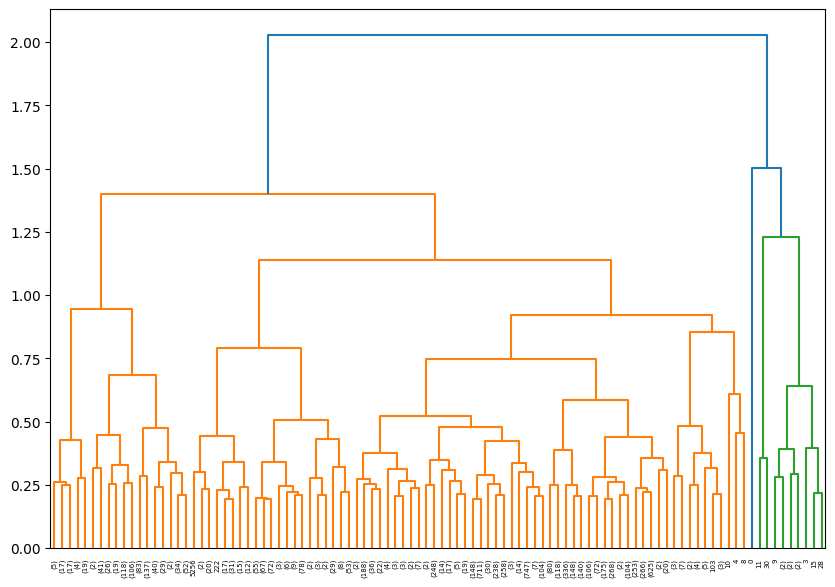

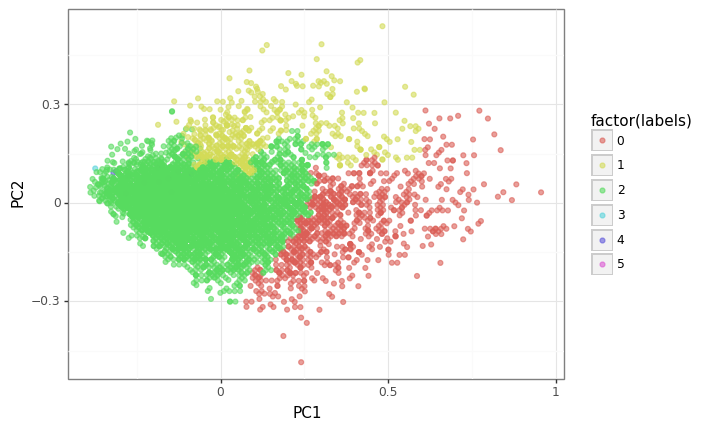

<ggplot: (310924833)>

In [19]:
#Visualizando los clusters con PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca = pca.fit(newData)
tempData = pca.transform(newData)
tempData.shape
tempData = pd.DataFrame(tempData,columns=["PC1","PC2"])
tempData["labels"]=clusters
ggplot(tempData)+aes(x="PC1",y="PC2",color="factor(labels)")+geom_point(alpha=0.6)+theme_bw()




* El cluster 0 son juegos malos
* El cluster 1 resume el resto de los juegos no considerados entre cluster 0 y 2
* El cluster 2 son juegos promedio y buenos, donde tanto la crítica del usuario como de los expertos pudo ser muy buena o promedio.
* El cluster 3 corresponde a 2 juegos (Grand Theft Auto: San Andreas y Gran Turismo 4), estos juegos están muy juegos muy bien evaluados y con ventas importantes en todos los mercados excepto Europa
* El cluster 4 corresponde a juegos muy bien evaluados y con ventas importantes en todos los mercados, llama la atención que estos juegos corresponden a solo dos plataformas wii y ds
* El cluster 5 es un outlier, a pesar de tener una de las mejores ventas a nivel mundial, su crítica de experto es promedio, este juego corresponde a wii_sport

In [20]:
origData.iloc[clusters==1,:]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
29,Call of Duty: Modern Warfare 3,X360,2011.0,Shooter,Activision,9.04,4.24,0.13,1.32,14.73,88.0,81.0,3.4,8713.0,"Infinity Ward, Sledgehammer Games",M
34,Call of Duty: Black Ops II,PS3,2012.0,Shooter,Activision,4.99,5.73,0.65,2.42,13.79,83.0,21.0,5.3,922.0,Treyarch,M
35,Call of Duty: Black Ops II,X360,2012.0,Shooter,Activision,8.25,4.24,0.07,1.12,13.67,83.0,73.0,4.8,2256.0,Treyarch,M
37,Call of Duty: Modern Warfare 3,PS3,2011.0,Shooter,Activision,5.54,5.73,0.49,1.57,13.32,88.0,39.0,3.2,5234.0,"Infinity Ward, Sledgehammer Games",M
60,Call of Duty: Ghosts,X360,2013.0,Shooter,Activision,6.73,2.56,0.04,0.91,10.25,73.0,29.0,2.6,2117.0,Infinity Ward,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16233,Madden NFL 13,PS3,2012.0,Sports,Electronic Arts,0.00,0.01,0.00,0.00,0.01,83.0,22.0,5.5,101.0,EA Tiburon,E
16317,Prototype: Biohazard Bundle,XOne,2016.0,Action,Activision,0.01,0.00,0.00,0.00,0.01,56.0,4.0,3.1,14.0,Radical Entertainment,M
16380,Tiger Woods PGA Tour 2005,PC,2004.0,Sports,Electronic Arts,0.00,0.01,0.00,0.00,0.01,91.0,16.0,4.5,39.0,Headgate,E
16617,Dragon Ball Z for Kinect,X360,2012.0,Fighting,Namco Bandai Games,0.01,0.00,0.00,0.00,0.01,49.0,32.0,2.1,39.0,Spike,T
